<a href="https://colab.research.google.com/github/flavionakao/Mackenzie/blob/main/PL_Python_4_exercicio_preenchido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

# 4 Estudos de Caso de Análise de Dados I
Professores: *Diego Nogare* & *Rogério de Oliveira* 

<br>
<br>

---


# Exercícios

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# WHO Worl Health Organization

Os dados abaixo foram obtidos diretamente da Organização Mundial de Saúde. Empregue os dados de 2015 já selecionados abaixo para responder as perguntas.

In [3]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Qualidade dos Dados

Verifique a Qualidade dos Dados. Quantos atributos apresentam dados ausentes a qual atributo tem o maior percentual de dados ausentes?

In [5]:
# Seu código
nulos = pd.DataFrame(WHO.isnull().sum())
nulos['perc'] = nulos[0] / len(WHO)
nulos[nulos[0] > 0]

,0,perc
Alcohol,177,0.967213
Hepatitis B,9,0.049180
BMI,2,0.010929
Total expenditure,181,0.989071
GDP,29,0.158470
Population,41,0.224044
thinness 1-19 years,2,0.010929
thinness 5-9 years,2,0.010929
Income composition of resources,10,0.054645
Schooling,10,0.054645


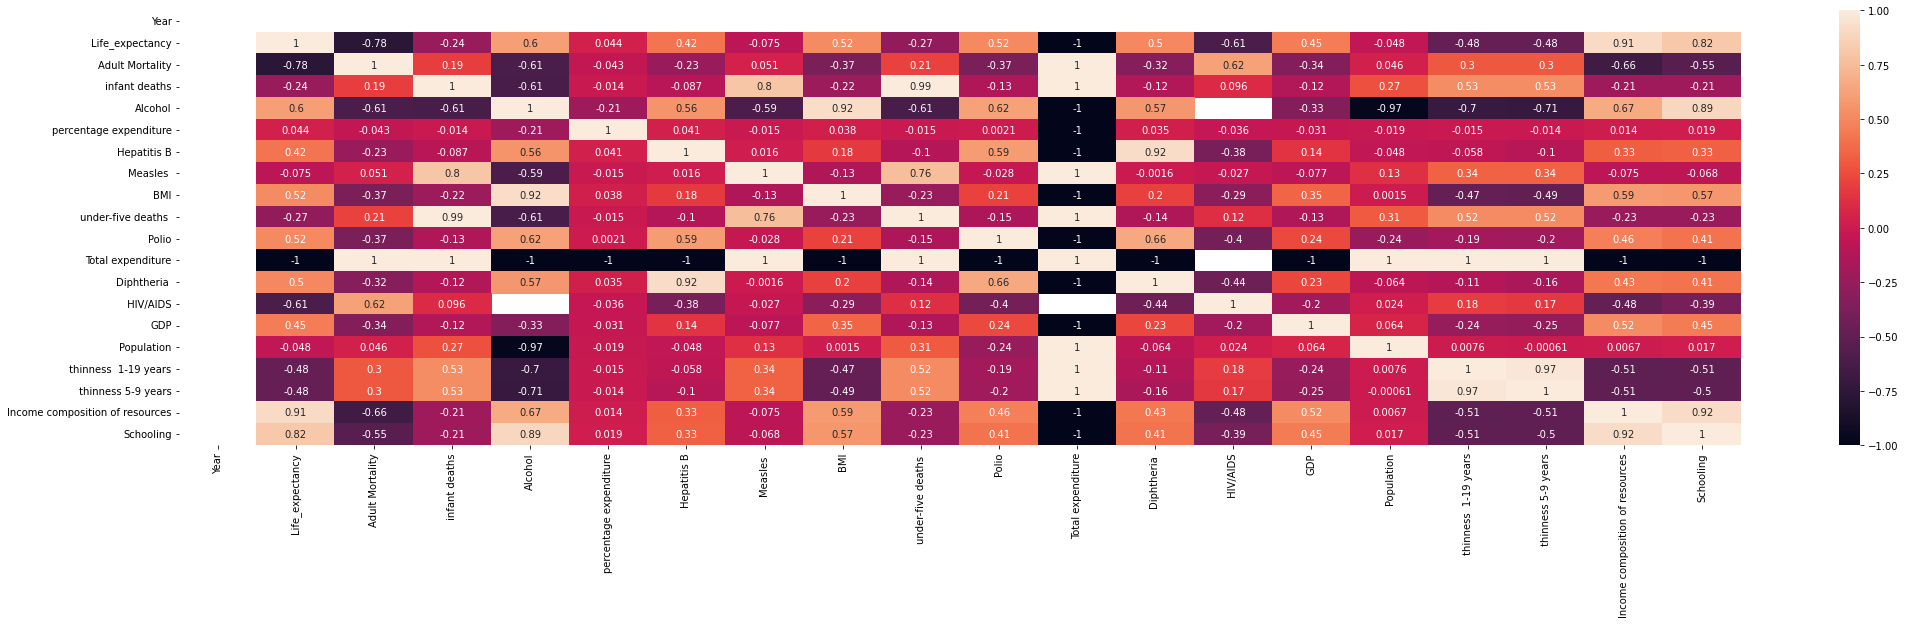

In [6]:
  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.figure(figsize=(35,8))
  ax = sns.heatmap(WHO.corr(), annot=True)

# Qualidade dos Dados

Alguns países estão classificados como países *em desenvolvimento* e parecem destoar do nosso entendimento geral de países *desenvolvidos $\times$ em desenvolvimento*. Quais dois países parecem se enquadrar neste caso?

(Dica: verifique os países em desenvolvimento que apresentam um GDP que discrepante dos demais) 

In [11]:
# Seu código
WHO.describe()

indev = WHO[WHO['Status'] == 'Developing']
indev[['Country', 'Status', 'GDP']].sort_values('GDP', ascending=False)

,Country,Status,GDP
2071,Qatar,Developing,66346.52267
496,Canada,Developing,43315.74400
930,France,Developing,36526.77110
1266,Israel,Developing,35729.37253
1394,Kuwait,Developing,28975.41800
...,...,...,...
2585,The former Yugoslav republic of Macedonia,Developing,NaN
2778,United Republic of Tanzania,Developing,NaN
2858,Venezuela (Bolivarian Republic of),Developing,NaN
2874,Viet Nam,Developing,NaN


# Distribuição dos Dados

Analise a Distribuição da Expectativa de Vida entre os países Desenvolvidos e em Desenvolvimento. O que você consegue afirmar sobre essas distribuições? 

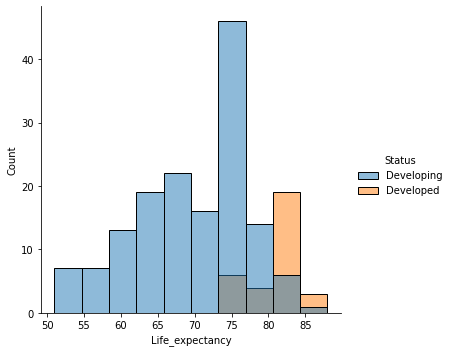

In [10]:
# Seu código
sns.displot(WHO, x="Life_expectancy", hue="Status")

# Relações

Quais índices aparecem como mais correlacionados a Expectativa de Vida dos países em Desenvolvimento?  

In [9]:
# Seu código
pd.DataFrame(WHO.corr()['Life_expectancy']).sort_values('Life_expectancy')

,Life_expectancy
Total expenditure,-1.000000
Adult Mortality,-0.779119
HIV/AIDS,-0.608345
thinness 5-9 years,-0.475027
thinness 1-19 years,-0.475020
under-five deaths,-0.271921
infant deaths,-0.241290
Measles,-0.074617
Population,-0.048461
percentage expenditure,0.043964


# Ranking

Qual a posição do Brasil no Ranking de Escolaridade (`Schooling`) com relação aos demais países? 

In [7]:
# Seu código
WHO[['Country', 'Schooling']].sort_values('Schooling', ascending=False).reset_index().head(50)

,index,Country,Schooling
0,112,Australia,20.4
1,737,Denmark,19.2
2,1845,New Zealand,19.2
3,1170,Iceland,19.0
4,1250,Ireland,18.6
5,1829,Netherlands,18.1
6,2425,Spain,17.7
7,1910,Norway,17.7
8,80,Argentina,17.3
9,2345,Slovenia,17.3
